In [1]:
import sys
sys.path.insert(0, '/home/ldoyle/packages')
import h5py
import numpy as np
from tqdm import tqdm
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import pysindy as ps
from lr_ed import localreg
from datetime import datetime
from scipy.fft import fft, fftfreq,rfft2

import scipy.signal as signal
from obspy.signal import filter as obsfilt

In [2]:
import glob
file_list = glob.glob("/home/ldoyle/notebooks/rad_10_smooth_data/*")

In [7]:
show = np.load(file_list[8])
show *= (2*np.pi)/2**16
n = 1.4682
L = 51.04762
show *= (1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L)

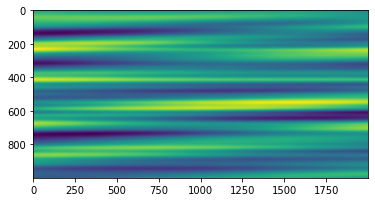

In [3]:
plt.figure()
plt.imshow(show[:1000,:2000])
# plt.yticks(np.arange(5000),np.arange(5,step=1/1000))
plt.show()

In [15]:
np.amin(show)

-2.125992581209079

In [ ]:
# from matplotlib.animation import FuncAnimation
# import ffmpeg
# from IPython import display

# fig, ax = plt.subplots()
# xdata, ydata = [], []
# ln, = ax.plot([], [], 'ro')

# def init():
#     ax.set_xlim(0, 2.)
#     ax.set_ylim(-3.5, 3.5)
#     return ln,

# def update(frame):
#     xdata = np.arange(1000)*(2/1000)
#     ydata = show[:1000,frame*10]
#     ln.set_data(xdata, ydata)
#     return ln,

# ani = FuncAnimation(fig, update, frames=200,
#                     init_func=init, interval=50, blit=True)
# plt.show()

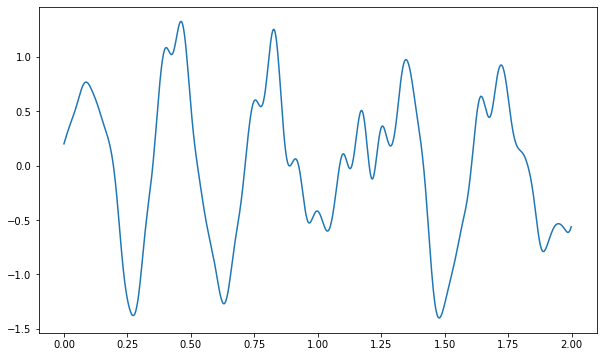

In [24]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1000)*.002, show[:1000,100])
plt.show()

In [5]:
time_subsample = 1
full_dat = np.load(file_list[0])#data[7500:12500,::time_subsample]

for i in np.arange(1,len(file_list)):
    tmp=np.load(file_list[i])
#     print(tmp.shape)
    full_dat = np.hstack((full_dat,tmp))


full_dat *= (2*np.pi)/2**16
n = 1.4682
L = 51.04762
full_dat *= (1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L)

In [6]:
full_dat.shape

(5000, 336000)

In [7]:
time_subsample = 10
full_dat = full_dat[:,::time_subsample]
fk_dat = np.fft.fftn(full_dat)

xf = np.fft.fftfreq(5000, d=2)

In [8]:
tf = np.fft.fftfreq(full_dat.shape[1], d=time_subsample/200)#[:N//2]

X, Y = np.meshgrid(tf,xf)

In [13]:
X.shape

(5000, 24000)

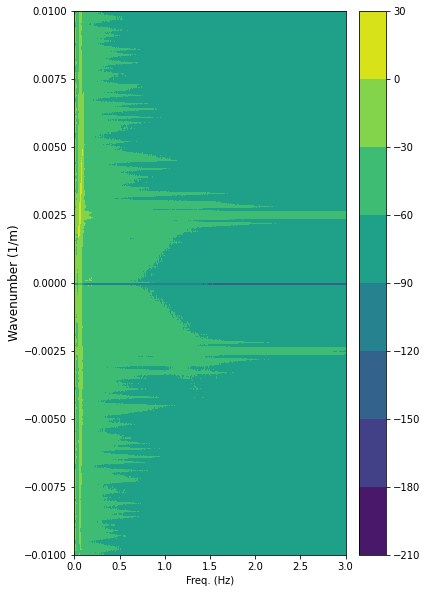

In [10]:
plt.figure(figsize=(6,10))
cp = plt.contourf(X[:,:X.shape[1]//2], Y[:,:X.shape[1]//2], 10*np.log10(np.abs(fk_dat[:,:X.shape[1]//2])**2))

# plt.scatter(np.sqrt(9.8*np.linspace(-0.01,0.01,30)*np.tanh(140*np.linspace(-0.01,0.01,30))),
#             np.linspace(-0.01,0.01,30), c="k")
# plt.scatter(-np.sqrt(9.8*np.linspace(-0.01,0.01,30)*np.tanh(50*np.linspace(-0.01,0.01,30))),
#             np.linspace(-0.01,0.01,30), c="k")
plt.xlim(-0.,3.)
plt.ylim(-0.01,0.01)
plt.xlabel("Freq. (Hz)")
plt.ylabel("Wavenumber (1/m)",size=12)
plt.colorbar(cp, pad = 0.04)
plt.show()

In [ ]:
# phase velocities
c_vals = np.zeros(fk_dat.shape[0]*fk_dat.shape[1]/4)
freq_ij = np.zeros(fk_dat.shape[0]*fk_dat.shape[1]/4)
k=0
for i in np.arange(fk_dat.shape[0]//2):
    for j in np.arange(fk_dat.shape[1]//2)
        freq_ij[k] = X[i,j]
        c_vals[k] = Y[i,j]/X[i,j]
    

## strain

In [5]:
# start=full_dat[:,:24000]
# start *= (2*np.pi)/2**16

In [6]:
# n = 1.4682
# L = 51.04762
# start *= (1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L)

In [33]:
full_dat[y_lims[0]:y_lims[1]:downsample_space,x_lims[0]:x_lims[1]:downsample_time].shape

(500, 1200)

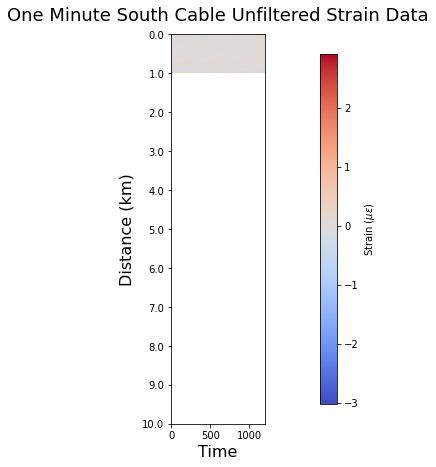

In [38]:
# font = {'size'   : 14}

# matplotlib.rc('font', **font)

downsample_space=10 # At the scale of plotting, the downsampling is imperceptible
downsample_time=10 # At the scale of plotting, the downsampling is imperceptible

# toas = list(map(datetime.utcfromtimestamp, [timestamp[0], timestamp[-1]]))
# toas = mdates.date2num(toas)
x_lims = [0,12000]
y_lims = [0,5000]
fig, ax = plt.subplots(figsize = (16, 6))
fig.patch.set_facecolor('white') # Good for dark themed notebooks
plt.tight_layout()
im = ax.imshow(((10**6)*full_dat[y_lims[0]:y_lims[1]:downsample_space,x_lims[0]:x_lims[1]:downsample_time]),
#                extent = [0,500, 0,1200],
               cmap = 'coolwarm')

ax.set_xlabel("Time",size=16)
ax.set_ylabel("Distance (km)",size=16, labelpad = 8)#, fontsize = 16)


jump_val = 500

# ax.set_xticks(np.linspace(0,12000, 5))#,np.linspace(0,12000, 5)/10000)
# ax.xaxis_date()
# date_format = mdates.DateFormatter('%d-%b\n%H:%M:%S.%f')
# ax.xaxis.set_major_formatter(date_format)
# ax.set_xticklabels([x.strftime('%d-%b\n%H:%M:%S.%f') for x in mdates.num2date(np.linspace(toas[0], toas[1], 5))])
# plt.xticks(rotation=15)

plt.yticks(np.arange(y_lims[0], y_lims[1]+jump_val, jump_val),
           np.round((2/1000)*np.arange(y_lims[0], y_lims[1]+jump_val, jump_val)))

ax.set_title("One Minute South Cable Unfiltered Strain Data",fontsize=18,y=1.02)#file.split('.')[0])
plt.colorbar(im, label='Strain ($\mu \epsilon$)', ax = ax, pad = 0.05,shrink=0.9)
plt.show()

## Model Identification

In [74]:
n = 1.4682
L = 51.04762
file1 = file_list[14]
file2 = file_list[15]
file3 = file_list[16]
working_dat = np.hstack((np.load(file1), np.load(file2),  np.load(file3)))
working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat #np.load('/home/ldoyle/notebooks/rad_10_smooth_data/gaussian_smoothed_channels_7500_12500_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy')#full_dat[:,:24000]
working_dat = working_dat.T *10**6#/(np.std(working_dat))
working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)

In [59]:
# working_dat = working_dat[::10,:,:]

In [75]:
working_dat.shape

(36000, 5000, 1)

In [76]:
dt=1./200
xs = 2.0419047*np.arange(working_dat.shape[1])
# time = dt*np.arange(working_dat.shape[0])

library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=4,
    spatial_grid=xs,
    include_bias=True,
    is_uniform=True,
#     periodic=True
)

In [77]:
thresh = 2.
optimizer = ps.STLSQ(threshold=thresh, alpha=0.001, max_iter=50)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)


library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

In [48]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#beginning data

Ensemble STLSQ with Threshold 0.8
(x0)' = 0.887 x0_1 + -1.047 x0_111 + -1.337 x0x0_11 + 1.483 x0x0_1111


In [49]:
to_pred = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*full_dat[:,-48000:-43000]
to_pred = to_pred.T/(np.std(to_pred))
to_pred = to_pred.reshape(to_pred.shape[0],to_pred.shape[1],1)

In [50]:
output = model.predict(to_pred)
np.save('test_deriv.npy',output)

In [85]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()

Ensemble STLSQ with Threshold 0.6
(x0)' = 0.676 x0_1 + 9.659 x0_111 + 1.045 x0_1111 + -1.203 x0x0_11 + -2.245 x0x0x0_11


In [19]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()

Ensemble STLSQ with Threshold 3.0
(x0)' = -15.534 x0_1 + -19.324 x0_111 + -3.325 x0x0_11


In [21]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()

Ensemble STLSQ with Threshold 4.0
(x0)' = -16.183 x0_1 + -19.616 x0_111


In [39]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()

Ensemble STLSQ with Threshold 11.97
(x0)' = -17.431 x0_1 + -21.265 x0_111


In [17]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

Ensemble STLSQ with Threshold 1.2
(x0)' = -4.418 x0x0_111 + 2.377 x0x0x0_111 + -6.387 x0x0_1111 + 3.026 x0x0x0_1111


In [23]:
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

Ensemble STLSQ with Threshold 3.5
(x0)' = -3.947 x0x0_111 + -5.687 x0x0_1111


In [41]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 16 and 17
Ensemble STLSQ with Threshold 3.0
(x0)' = -4.492 x0_1 + -12.607 x0_111 + 4.655 x0x0_111 + 10.045 x0x0_1111


In [23]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 16 and 17
Ensemble STLSQ with Threshold 3.0
(x0)' = -4.358 x0_111


In [28]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 26 and 27
Ensemble STLSQ with Threshold 3.0
(x0)' = -4.559 x0_1


In [32]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 26 and 27
Ensemble STLSQ with Threshold 3.0
(x0)' = -4.667 x0_1


In [47]:
print("For Samples: "+file1[-9:-7]+", "+ file2[-9:-7]+", and "+file3[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 26, 27, and 28
Ensemble STLSQ with Threshold 0.1
(x0)' = -0.237 x0_1 + -0.122 x0_11 + -0.230 x0_111 + -0.156 x0_1111 + 0.131 x0x0_11 + 0.257 x0x0x0_111 + 0.156 x0x0_1111 + 0.361 x0x0x0_1111


In [67]:
print("For Samples: "+file1[-9:-7]+", "+ file2[-9:-7]+", and "+file3[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 26, 27, and 28
Ensemble STLSQ with Threshold 2.0
(x0)' = 5.528 x0_1 + 2.250 x0_111 + 2.820 x0x0_1 + 6.031 x0x0_11


In [73]:
print("For Samples: "+file1[-9:-7]+", "+ file2[-9:-7]+", and "+file3[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 18, 19, and 20
Ensemble STLSQ with Threshold 1.5
(x0)' = 2.575 x0_1 + 3.655 x0_111 + 1.576 x0x0_1 + 3.223 x0x0_11 + -3.888 x0x0_1111


In [78]:
print("For Samples: "+file1[-9:-7]+", "+ file2[-9:-7]+", and "+file3[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 25, 26, and 27
Ensemble STLSQ with Threshold 2.0
(x0)' = 4.397 x0_1


## Normalized with No Units

In [6]:
n = 1.4682
L = 51.04762
file1 = file_list[0]
file2 = file_list[1]
# file3 = file_list[16]
working_dat = np.load(file1)[::10,::10] #np.hstack((np.load(file1)[::10,::10], np.load(file2)[::10,::10])) #,  np.load(file3)))
# working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat #np.load('/home/ldoyle/notebooks/rad_10_smooth_data/gaussian_smoothed_channels_7500_12500_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy')#full_dat[:,:24000]
working_dat = working_dat.T/(np.std(working_dat))
mean_remove = (working_dat - np.mean(working_dat,axis=0)).T
working_dat = mean_remove.reshape(mean_remove.shape[0],mean_remove.shape[1],1)

In [7]:
working_dat.shape

(500, 1200, 1)

In [17]:
dt=1. #/200
xs = np.arange(working_dat.shape[0])#//10)
# time = dt*np.arange(working_dat.shape[0]//10)
# X, T = np.meshgrid(xs, time)
# XT = np.transpose([X, T], [1, 2, 0])

library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=4,
    spatial_grid=xs,
    include_bias=True,
    is_uniform=True,
#     periodic=True
)

In [18]:
thresh = .05
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

In [19]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 11 and 12
Ensemble STLSQ with Threshold 0.05
(x0)' = 0.061 x0_1


In [51]:
thresh = 5e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

In [52]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 21 and 12
Ensemble STLSQ with Threshold 0.005
(x0)' = 0.067 x0_1 + 0.058 x0_111


In [26]:
thresh = 2.4e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)


In [27]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 11 and 12
Ensemble STLSQ with Threshold 0.0024
(x0)' = 0.067 x0_1 + 0.048 x0_111 + -0.003 x0_1111


In [36]:
thresh = 2e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)


In [37]:
print("For Samples: "+file1[-9:-7])#+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 11
Ensemble STLSQ with Threshold 0.002
(x0)' = 0.069 x0_1 + 0.057 x0_111 + -0.002 x0_1111 + -0.002 x0x0_111 + -0.009 x0x0_1111


In [ ]:
# SECOND FILE

In [38]:
n = 1.4682
L = 51.04762
file1 = file_list[10]
# file2 = file_list[1]
# file3 = file_list[16]
working_dat = np.load(file1)[::10,::10] #np.hstack((np.load(file1)[::10,::10], np.load(file2)[::10,::10])) #,  np.load(file3)))
# working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat #np.load('/home/ldoyle/notebooks/rad_10_smooth_data/gaussian_smoothed_channels_7500_12500_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy')#full_dat[:,:24000]
working_dat = working_dat.T/(np.std(working_dat))
mean_remove = (working_dat - np.mean(working_dat,axis=0)).T
working_dat = mean_remove.reshape(mean_remove.shape[0],mean_remove.shape[1],1)

In [39]:
working_dat.shape

(500, 1200, 1)

In [40]:
dt=1. #/200
xs = np.arange(working_dat.shape[0])#//10)
# time = dt*np.arange(working_dat.shape[0]//10)
# X, T = np.meshgrid(xs, time)
# XT = np.transpose([X, T], [1, 2, 0])

library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=4,
    spatial_grid=xs,
    include_bias=True,
    is_uniform=True,
#     periodic=True
)

In [41]:
thresh = .05
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

In [42]:
print("For Samples: "+file1[-9:-7])#+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 21
Ensemble STLSQ with Threshold 0.05
(x0)' = 0.067 x0_1 + 0.058 x0_111


In [43]:
thresh = 8e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)

In [44]:
print("For Samples: "+file1[-9:-7])#+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 21
Ensemble STLSQ with Threshold 0.008
(x0)' = 0.067 x0_1 + 0.058 x0_111


In [45]:
thresh = 2.4e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)


In [46]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 21 and 12
Ensemble STLSQ with Threshold 0.0024
(x0)' = 0.067 x0_1 + 0.057 x0_111


In [49]:
thresh = 1e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=60)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)


In [50]:
print("For Samples: "+file1[-9:-7])#+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 21
Ensemble STLSQ with Threshold 0.001
(x0)' = 0.067 x0_1 + -0.001 x0_11 + 0.058 x0_111 + -0.003 x0_1111 + -0.002 x0x0_11


In [112]:
dt=1.
x = np.arange(working_dat.shape[0])

library_functions = [lambda x: x, lambda x: x * x]
library_function_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=4,
    spatial_grid=x,
    include_bias=True,
    is_uniform=True,
#     periodic=True
)

thresh = 5e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=50)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt)#,ensemble=True)

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7f6a38e19100>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=1e-05, max_iter=50, threshold=0.005))

In [ ]:
thresh = 3e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-3, max_iter=50)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)


In [ ]:
print("For Samples: "+file1[-9:-7])#+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

In [114]:
print("For Samples: "+file1[-9:-7])#+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()

For Samples: 11
Ensemble STLSQ with Threshold 0.005
(x0)' = 0.067 x0_1 + 0.045 x0_111


In [115]:
thresh = 2e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=50)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt)#,ensemble=True)

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=<pysindy.feature_library.pde_library.PDELibrary object at 0x7f6a38e19100>,
      feature_names=['x0'],
      optimizer=STLSQ(alpha=1e-05, max_iter=50, threshold=0.002))

In [116]:
print("For Samples: "+file1[-9:-7])#+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()

For Samples: 11
Ensemble STLSQ with Threshold 0.002
(x0)' = 0.067 x0_1 + 0.048 x0_111 + -0.002 x0_1111 + -0.003 x0x0_1111


In [150]:
n = 1.4682
L = 51.04762
file1 = file_list[18]
file2 = file_list[19]
# file3 = file_list[16]
working_dat = np.hstack((np.load(file1)[::10,::10], np.load(file2)[::10,::10])) #,  np.load(file3)))
# working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat #np.load('/home/ldoyle/notebooks/rad_10_smooth_data/gaussian_smoothed_channels_7500_12500_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy')#full_dat[:,:24000]
working_dat = working_dat.T/(np.std(working_dat))
mean_remove = (working_dat - np.mean(working_dat,axis=0)).T
working_dat = mean_remove.reshape(mean_remove.shape[0],mean_remove.shape[1],1)

In [151]:
working_dat.shape

(500, 2400, 1)

In [152]:
thresh = 3e-3
optimizer = ps.STLSQ(threshold=thresh, alpha=1e-5, max_iter=50)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer)
model.fit(working_dat, t=dt,ensemble=True)

library_ensemble_coefs = model.coef_list
mean_library_ensemble = np.mean(library_ensemble_coefs, axis=0)
std_library_ensemble = np.std(library_ensemble_coefs, axis=0)


In [153]:
print("For Samples: "+file1[-9:-7]+" and "+file2[-9:-7])
print("Ensemble STLSQ with Threshold "+str(thresh))
model.print()
#rad10 data

For Samples: 29 and 30
Ensemble STLSQ with Threshold 0.003
(x0)' = 0.065 x0_1 + 0.042 x0_111 + -0.004 x0_1111


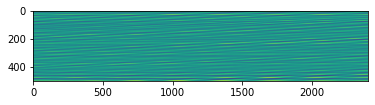

In [149]:
n = 1.4682
L = 51.04762
file1 = file_list[8]
file2 = file_list[9]
# file3 = file_list[16]
working_dat = np.hstack((np.load(file1)[::10,::10], np.load(file2)[::10,::10])) #,  np.load(file3)))
# # working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat #np.load('/home/ldoyle/notebooks/rad_10_smooth_data/gaussian_smoothed_channels_7500_12500_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy')#full_dat[:,:24000]
# working_dat = working_dat.T/(np.std(working_dat))
# mean_remove = (working_dat - np.mean(working_dat,axis=0)).working_dat
working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)
plt.imshow(working_dat[:,:,0])